In [ ]:
!pip install lazypredict
import os
os.kill(os.getpid(), 9)

     |████████████████████████████████| 10.1 MB 5.8 MB/s 
     |████████████████████████████████| 6.8 MB 26.0 MB/s 
     |████████████████████████████████| 269 kB 50.7 MB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
     |████████████████████████████████| 248 kB 53.1 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 72 kB 930 kB/s 
     |████████████████████████████████| 127.6 MB 23 kB/s 
     |████████████████████████████████| 14.5 MB 24.6 MB/s 
     |████████████████████████████████| 302 kB 43.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=ce7c317761af000dc8a2e970a1e7c8f612aad0930397cc7bd1a237c92d430b00
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully u

In [14]:
from sklearn.model_selection import train_test_split
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
support_data = pd.read_csv('/content/train_support_12s_only - resample_pos_neg (1).csv',na_values='.')
df = support_data

cols = df.select_dtypes(include='object').columns
df[cols]=df[cols].astype('category')
#df.drop(cols, axis=1, inplace=True)


X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [15]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.60,0.60,0.60,0.60,0.31
GaussianNB,0.60,0.60,0.60,0.60,0.03
RandomForestClassifier,0.60,0.60,0.60,0.59,0.63
NearestCentroid,0.59,0.59,0.59,0.59,0.03
LGBMClassifier,0.59,0.59,0.59,0.59,0.57
SVC,0.59,0.59,0.59,0.59,0.23
BernoulliNB,0.58,0.58,0.58,0.58,0.03
XGBClassifier,0.58,0.58,0.58,0.58,0.55
QuadraticDiscriminantAnalysis,0.58,0.58,0.58,0.58,0.03


In [16]:
from sklearn.metrics import classification_report
#predictions_summary=pd.DataFrame(X_test)
for key, model in model_dictionary.items():
  print(key)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       149
           1       0.57      0.55      0.56       144

    accuracy                           0.58       293
   macro avg       0.58      0.58      0.58       293
weighted avg       0.58      0.58      0.58       293

BaggingClassifier
              precision    recall  f1-score   support

           0       0.53      0.64      0.58       149
           1       0.52      0.40      0.45       144

    accuracy                           0.53       293
   macro avg       0.52      0.52      0.52       293
weighted avg       0.53      0.53      0.52       293

BernoulliNB
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       149
           1       0.58      0.53      0.55       144

    accuracy                           0.58       293
   macro avg       0.58      0.58      0.58       293
weighted avg       0.58  

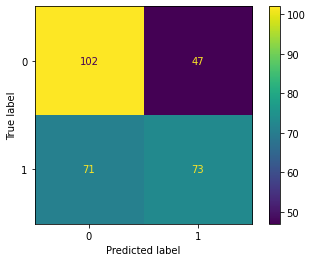

In [17]:
#model= model_dictionary['NearestCentroid']
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#for model in model_dictionary:  

model=model_dictionary['RandomForestClassifier']
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
pd.DataFrame(y_test)



,target_pos
547,1
1146,0
544,1
1041,0
873,0
...,...
1049,0
214,1
1578,0
767,0


In [18]:
pd.DataFrame(model.predict(X_test))

,0
0,0
1,0
2,0
3,0
4,0
...,...
288,1
289,0
290,0
291,0


In [ ]:
### Load training data for positive convos

from sklearn import datasets
from sklearn.model_selection import train_test_split
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Training Data May 3 all ids for machine learning project Rana - Simpler').worksheet('TrainPositiveConvos')
rows = worksheet.get_all_values()
# Convert to a DataFrame and render.
import pandas as pd
support_data = pd.DataFrame(worksheet.get_all_records())
X = support_data.iloc[:, :-1]
y = support_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [21]:

predictions_summary=pd.DataFrame(X_test)
predictions_summary['supportRana']=pd.DataFrame(y_test)
for key, model in model_dictionary.items():
  #print(key)
  model.fit(X_train, y_train)
  model.score(X_test,y_test)
  y_pred = model.predict(X_test)
  #testsdd[key]=X_test
  predictions_summary[key]=y_pred
  #cm = confusion_matrix(y_test, y_pred)
  #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  #disp.plot()
  #plt.show()
  #print(classification_report(y_test, y_pred))

In [ ]:
predictions_summary.to_csv('out.csv')
predictions_summary.corr()

,Sex,HD,Age,EconomyPersuasion,GunViolencePreventio,HealthcarePersuasion,ImmigrationPersuasio,CivPart,SocialPersuasion,TrumpPersuasion,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
Sex,1.00,-0.02,-0.03,0.12,0.09,-0.00,0.09,0.04,0.10,0.13,...,-0.01,0.05,-0.05,-0.06,-0.09,-0.11,0.09,-0.03,-0.03,0.01
HD,-0.02,1.00,0.22,0.02,0.06,-0.06,-0.05,-0.04,-0.11,0.03,...,0.04,0.08,-0.08,-0.22,-0.28,-0.27,-0.24,-0.27,-0.20,-0.21
Age,-0.03,0.22,1.00,-0.04,0.15,-0.16,-0.12,0.02,-0.05,-0.00,...,-0.47,-0.48,-0.29,-0.57,-0.65,-0.67,-0.42,-0.72,-0.35,-0.36
EconomyPersuasion,0.12,0.02,-0.04,1.00,0.89,0.87,0.80,-0.32,0.86,0.88,...,-0.03,0.03,-0.06,0.04,-0.01,-0.00,-0.02,0.05,-0.03,-0.02
GunViolencePreventio,0.09,0.06,0.15,0.89,1.00,0.85,0.83,-0.33,0.86,0.95,...,-0.11,-0.10,-0.10,-0.10,-0.12,-0.12,-0.12,-0.12,-0.08,-0.08
HealthcarePersuasion,-0.00,-0.06,-0.16,0.87,0.85,1.00,0.80,-0.38,0.87,0.86,...,0.03,0.02,0.01,0.13,0.14,0.15,0.12,0.18,0.07,0.05
ImmigrationPersuasio,0.09,-0.05,-0.12,0.80,0.83,0.80,1.00,-0.28,0.78,0.88,...,-0.08,0.03,-0.05,0.07,0.09,0.09,0.05,0.14,0.03,0.01
CivPart,0.04,-0.04,0.02,-0.32,-0.33,-0.38,-0.28,1.00,-0.34,-0.34,...,0.19,0.13,0.15,0.06,0.03,0.03,-0.19,0.06,0.03,0.06
SocialPersuasion,0.10,-0.11,-0.05,0.86,0.86,0.87,0.78,-0.34,1.00,0.85,...,-0.04,-0.03,0.01,0.07,0.04,0.04,0.08,0.05,0.03,0.02
TrumpPersuasion,0.13,0.03,-0.00,0.88,0.95,0.86,0.88,-0.34,0.85,1.00,...,-0.05,-0.01,-0.07,-0.01,0.02,0.01,0.01,0.00,-0.00,-0.01


In [ ]:
pd.DataFrame(y_test)

,target_pos
547,1
1146,0
544,1
1041,0
873,0
...,...
1073,0
1171,0
466,1
1174,0


              precision    recall  f1-score   support

          -1       0.56      0.75      0.64        12
           1       0.88      0.75      0.81        28

    accuracy                           0.75        40
   macro avg       0.72      0.75      0.73        40
weighted avg       0.78      0.75      0.76        40

[0.1685513  0.04375911 0.03431244 0.0457671  0.01687402 0.07177471
 0.02324411 0.02486131 0.03142956 0.0232363  0.01864764 0.00723211
 0.02715721 0.03452414 0.01520702 0.04220859 0.02253837 0.01696146
 0.01670991 0.01051612 0.02289729 0.03116288 0.01706931 0.01314494
 0.02646654 0.0441829  0.02644637 0.01869363 0.01231986 0.09210379
 0.        ]


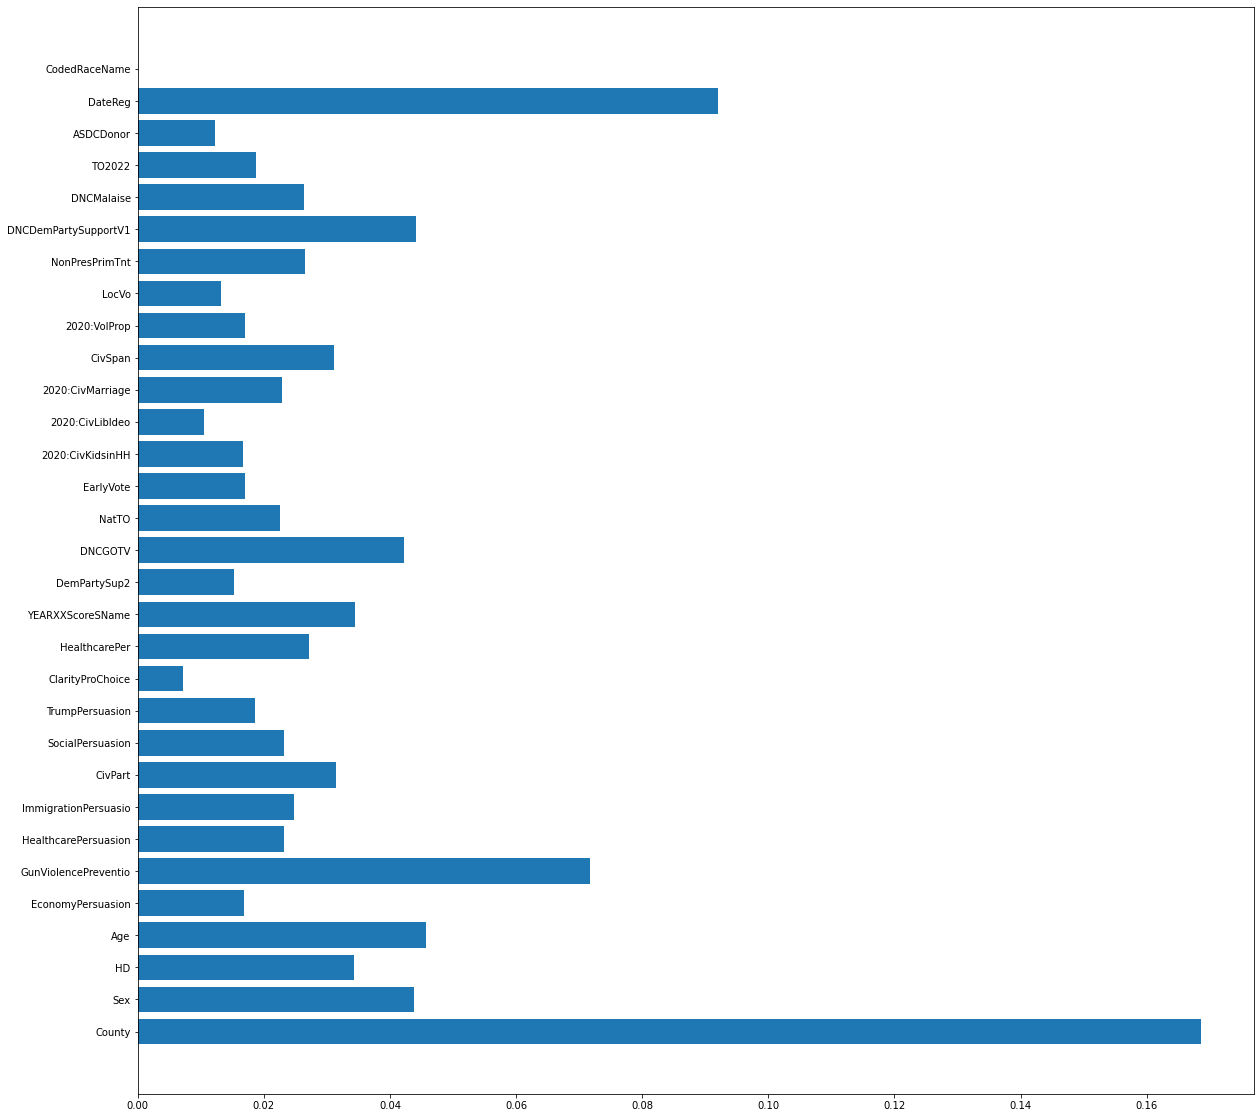

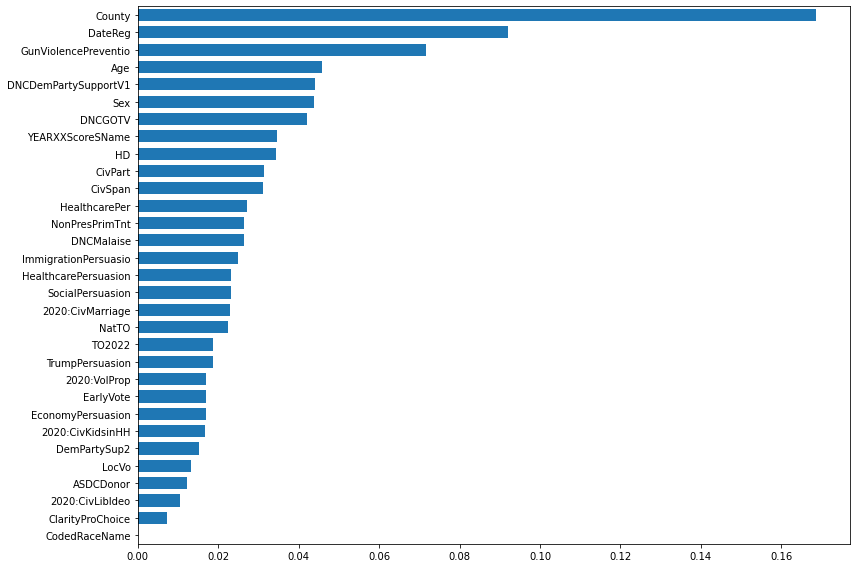

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier(gamma=.001,max_depth=50)
model.fit(X_train, y_train)

#howgood
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
probabilities=model.predict_proba(X_test)


# feature importance
print(model.feature_importances_)
# plot
pyplot.barh(range(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(range(len(X.columns)), X.columns)
pyplot.show()

clf=model
data=support_data
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
#ax2.boxplot(
#    result.importances[perm_sorted_idx].T,
#    vert=False,
#    labels=data.columns[perm_sorted_idx],
#)
#ax2.set_yticklabels(data.columns[tree_importance_sorted_idx])

fig.tight_layout()
plt.show()


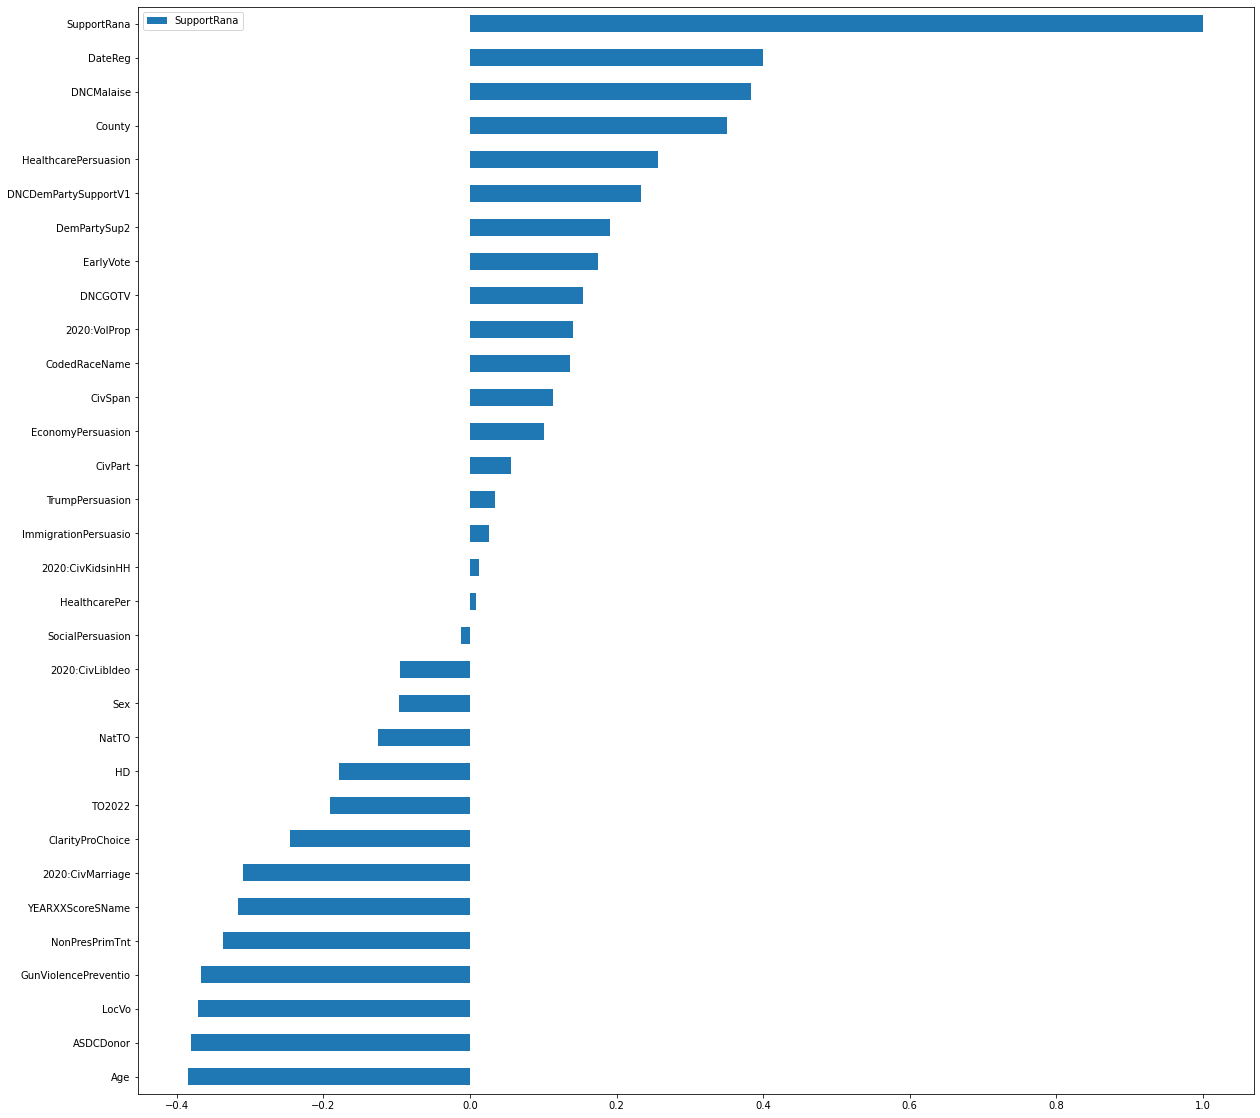

In [ ]:
import matplotlib.pyplot as plt

correlations=df=pd.DataFrame((support_data.corr()['SupportRana']),support_data.corr().columns)
#correlations.columns
correlations=correlations.sort_values(by='SupportRana')

correlations.plot.barh()
#ax1.set_yticks(correlations[0])
#ax1.set_yticklabels(data.columns[tree_importance_sorted_idx])
#ax1.set_ylim((0, len(clf.feature_importances_)))
#ax2.boxplot(
#    result.importances[perm_sorted_idx].T,
#    vert=False,
#    labels=data.columns[perm_sorted_idx],
#)
#ax2.set_yticklabels(data.columns[tree_importance_sorted_idx])

#fig.tight_layout()
#plt.show()

In [ ]:
pd.DataFrame(probabilities)


,0,1
0,0.58,0.42
1,0.60,0.40
2,0.61,0.39
3,0.65,0.35
4,0.57,0.43
...,...,...
499,0.59,0.41
500,0.54,0.46
501,0.43,0.57
502,0.62,0.38


In [ ]:
pd.DataFrame(y_test)

,target_pos
547,1
1146,0
544,1
1041,0
873,0
...,...
1073,0
1171,0
466,1
1174,0


In [ ]:
### Load training data for positive convos

from sklearn import datasets
from sklearn.model_selection import train_test_split
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Training Data May 3 all ids for machine learning project Rana').sheet1
rows = worksheet.get_all_values()
# Convert to a DataFrame and render.
import pandas as pd
support_data = pd.DataFrame(worksheet.get_all_records())


import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
columnTransformer = ColumnTransformer([('encoder', preprocessing.LabelEncoder(), [0])], remainder='passthrough')



X = support_data.iloc[:, :-1]

#X = np.array(columnTransformer.fit_transform(X), dtype = np.str)

y = support_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43) 

In [ ]:
X

,mAddress,mCity,mState,mZip5,mZip4,Sex,Address,City,State,Zip5,...,StreetName,StreetType,StreetSuffix,AptType,AptNo,PPI,religion_code,EthnicName,CodedRaceName,VotedStatus
0,240 E 79th St Apt 9B,New York,NY,10075,1261,F,240 E 79th St Apt 9B,New York,NY,10075,...,79th,St,,Apt,9B,51000,J,,White,
1,305 E 86th St Apt 6EW,New York,NY,10028,4704,F,305 E 86th St Apt 6EW,New York,NY,10028,...,86th,St,,Apt,6EW,,J,,White,
2,351 W 24th St Apt 14H,New York,NY,10011,1512,M,351 W 24th St Apt 14H,New York,NY,10011,...,24th,St,,Apt,14H,7000,P,,White,
3,351 W 24th St Apt 19J,New York,NY,10011,1508,M,351 W 24th St Apt 19J,New York,NY,10011,...,24th,St,,Apt,19J,20000,P,African,Black,
4,341 W 24th St Apt 1H,New York,NY,10011,1526,F,341 W 24th St Apt 1H,New York,NY,10011,...,24th,St,,Apt,1H,11000,J,,White,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,3551 21st St Apt 2B,Astoria,NY,11106,4715,F,3551 21st St Apt 2B,Astoria,NY,11106,...,21st,St,,Apt,2B,,,African,Black,
1673,370 1st Ave Apt 4E,New York,NY,10010,4928,F,370 1st Ave Apt 4E,New York,NY,10010,...,1st,Ave,,Apt,4E,,P,,White,
1674,3605 29th St Apt C10,Astoria,NY,11106,3223,F,3605 29th St Apt C10,Astoria,NY,11106,...,29th,St,,Apt,C10,,,Indian,Asian,
1675,3608 29th St Apt 1K,Astoria,NY,11106,3248,M,3608 29th St Apt 1K,Astoria,NY,11106,...,29th,St,,Apt,1K,,,,Asian,


In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [00:00<00:00, 58394.05it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
